### **Waffle charts**
- Representa datos categóricos en forma de
    - Tiles cuadrados
    - Celdas
- Representa la proporción o porcentage de diferentes categorías.

### **Word cloud**
- Presenta un resumen conciso del contenido textual
- Muestra la importancia de diferentes palabras

## **Seaborn**
- Librería de visualización basada en Matplotlib.
- La cantidad de código se ve ruducida.
- Graficos que se pueden hacer
    - Regression: `sns.regplot()`
    - Countplot: `sns.countplot()`
    - Barplot: `sns.barplot()`

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import numpy as np
import wordcloud
from PIL import Image

In [4]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')
df.set_index("Country", inplace=True)
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


# **Waffle Charts**
---

In [5]:
df_dsn = df.loc[["Denmark", "Norway", "Sweden"], :]

df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


### **1. Determinar la proproción de cada categoría con respecto al total**

In [7]:
total_values = df_dsn["Total"].sum()

category_proportions = df_dsn["Total"]/total_values

pd.DataFrame({"Category proportion": category_proportions})

,Category proportion
Country,
Denmark,0.322557
Norway,0.192409
Sweden,0.485034


### **2. Definir el tamaño total del gráfico de Waffle**

In [9]:
width = 40
height = 10

total_num_tiles = width * height

print(f"Total number of tiles is {total_num_tiles}")

Total number of tiles is 400


### **3. Emplear la proporción de cada categoría para determinar el número respectivo de tiles**

In [11]:
tiles_per_category = (category_proportions * total_num_tiles).round().astype(int)

pd.DataFrame({"Cantidad de tiles": tiles_per_category})

,Cantidad de tiles
Country,
Denmark,129
Norway,77
Sweden,194


### **4. Crear una matriz que reensamble el gráfico de waffle**

In [12]:
# initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height, width), dtype = np.uint)

# define indices to loop through waffle chart
category_index = 0
tile_index = 0

# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1

        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ...proceed to the next category
            category_index += 1       
            
        # set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index
        
print ('Waffle chart populated!')

Waffle chart populated!


In [13]:
waffle_chart

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

### **5. Mapear el gráfico de Waffle en forma visual**

<Figure size 640x480 with 0 Axes>

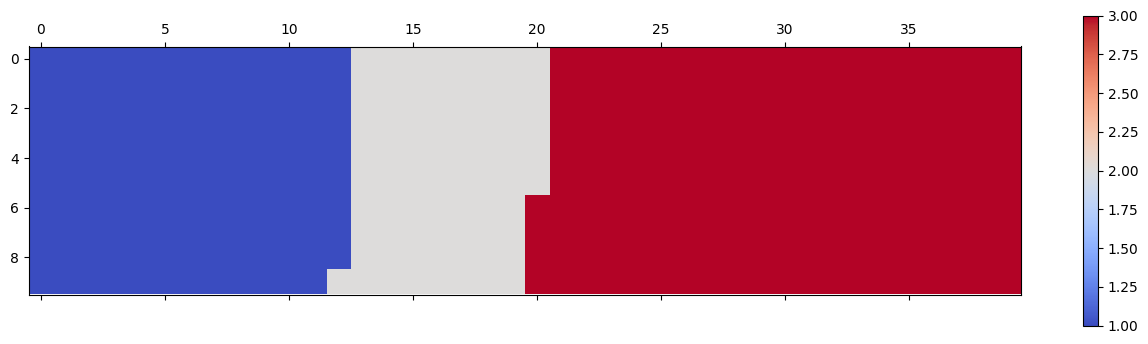

In [14]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()
plt.show()

<Figure size 640x480 with 0 Axes>

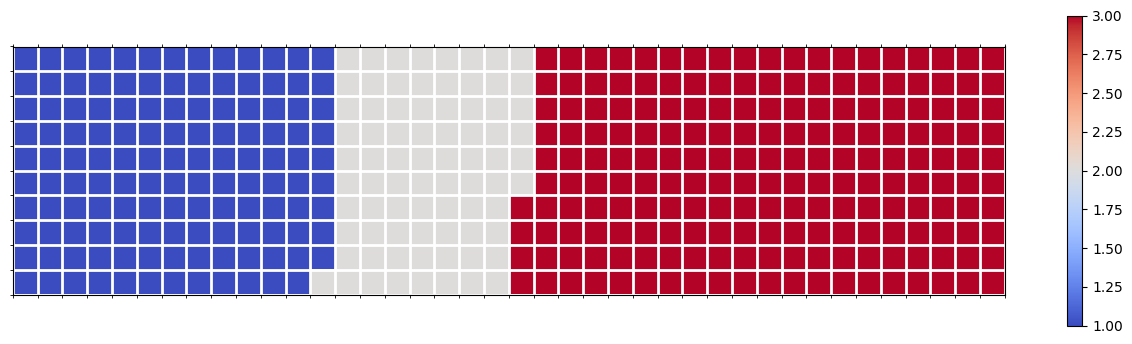

In [15]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])
plt.show()

C:\Users\AlxMa\AppData\Local\Temp\ipykernel_20832\1290087005.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_values = values_cumsum[len(values_cumsum) - 1]
C:\Users\AlxMa\AppData\Local\Temp\ipykernel_20832\1290087005.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
C:\Users\AlxMa\AppData\Local\Temp\ipykernel_20832\1290087005.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use

<Figure size 640x480 with 0 Axes>

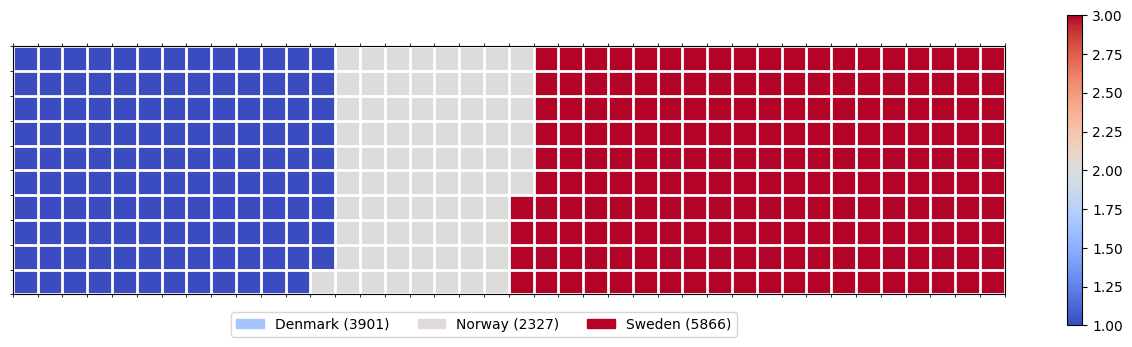

In [17]:
import matplotlib.patches as mpatches # needed for waffle Charts

# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

# create legend
legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center', 
           ncol=len(df_dsn.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )
plt.show()

# **Empelando pywaffle**

In [19]:
!pip install pywaffle

   ---------------------------------------- 0.0/25.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.6 MB 435.7 kB/s eta 0:00:59
   ---------------------------------------- 0.0/25.6 MB 326.8 kB/s eta 0:01:19
   ---------------------------------------- 0.1/25.6 MB 363.1 kB/s eta 0:01:11
   ---------------------------------------- 0.1/25.6 MB 302.7 kB/s eta 0:01:25
   ---------------------------------------- 0.1/25.6 MB 302.7 kB/s eta 0:01:25
   ---------------------------------------- 0.1/25.6 MB 308.0 kB/s eta 0:01:23
   ---------------------------------------- 0.1/25.6 MB 308.0 kB/s eta 0:01:23
   ---------------------------------------- 0.1/25.6 MB 284.4 kB/s eta 0:01:30
   ---------------------------------------- 0.1/25.6 MB 257.2 kB/s eta 0:01:40
   ---------------------------------------- 0.1/25.6 MB 257.2 kB/s eta 0:01:40


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\AlxMa\anaconda3\envs\Colab\Lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\AlxMa\anaconda3\envs\Colab\Lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\AlxMa\anaconda3\envs\Colab\Lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\AlxMa\anaconda3\envs\Colab\Lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 98, in read
    data: bytes = self.__fp.read(amt)
                  ^^^^^^^^^^^^^^^^^^^
  File "C:\Users\AlxMa\anaconda3\envs\Colab\Lib\http\client.py", line 473, in read
    s = self.fp.read(amt)
        ^^^^^^^^^^^^^^^^^
  File "C:\Users\AlxMa\anaconda3\envs\Colab\Lib\socket.py", lin

In [20]:
from pywaffle import Waffle

#Set up the Waffle chart figure

fig = plt.figure(FigureClass = Waffle,
                 rows = 20, columns = 30, #pass the number of rows and columns for the waffle 
                 values = df_dsn['Total'], #pass the data to be used for display
                 cmap_name = 'tab20', #color scheme
                 legend = {'labels': [f"{k} ({v})" for k, v in zip(df_dsn.index.values,df_dsn.Total)],
                            'loc': 'lower left', 'bbox_to_anchor':(0,-0.1),'ncol': 3}
                 #notice the use of list comprehension for creating labels 
                 #from index and total of the dataset
                )

#Display the waffle chart
plt.show()

ModuleNotFoundError: No module named 'pywaffle'

In [ ]:
df_ci = df[["China", "India"], :]
df_ci

In [ ]:
fig = plt.figure(FigureClass = Waffle,
                rows = 20, columns=30,
                values = df_ci["Total"],
                cmap_name = 'tab20',
                legend = {"legend": [f"{k} ({v})" for k, v in]})